<br><br><center><h1 style="font-size:4em;color:#2467C0">MODELO DE PERFILAMIENTO DE CLIENTES</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
Segmentación de clientes para personalizar la publicidad
<br>

Se aplican técnicas no supervisadas para crear grupos homogéneos
<br>
<br>
</td>
</tr>
</table>

In [0]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [0]:
base = pd.read_excel('base_optimizacion_rutas.xlsx')

In [0]:
base

,PROVINCIA,CANTON,PARROQUIA,NOMBRE,sector
0,AZUAY,CUENCA,MOLLETURO,ESCUELA DE EDUCACION BASICA BERTHA CABRERA PAL...,educacion
1,AZUAY,CUENCA,MOLLETURO,TRES DE MAYO,educacion
2,AZUAY,CUENCA,MOLLETURO,ESCUELA DE EDUCACION BASICA LUIS VELECELA YUNGA,educacion
3,AZUAY,CUENCA,MOLLETURO,ESTHER ALICIA ESPINOSA,educacion
4,AZUAY,CUENCA,MOLLETURO,ESCUELA DE EDUCACION BASICA 19 DE MARZO DE SAN...,educacion
...,...,...,...,...,...
18807,PICHINCHA,PUERTO QUITO,PUERTO QUITO,LA ABUNDANCIA,salud
18808,GUAYAS,NARANJITO,NARANJITO,CONSULTORIO PARTICULAR DR. HUMBERTO ZURITA,salud
18809,GUAYAS,NARANJITO,NARANJITO,CONSULTORIO PARTICULAR DR. OSWALDO BACUY,salud
18810,GUAYAS,NARANJITO,NARANJITO,CONSULTORIO PARTICULAR DR. GABRIEL AGUILAR,salud


In [0]:
random.seed(2020)
n=len(base)
n

18812

peso=[random.randrange(0,10) for _ in range (0,n)]
peso

# SIMULACION

In [0]:
#creacion de las categorias a simular
tamaño = [1, 2, 3]
#tamaño = ["más de 10kg", "De 2kg a 10kg", "menos de 2kg"]
dia_semana_envio = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes"]
dia_semana_entrega = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes"]
tipo_paquete = ["documentos", "medicamentos", "ropa", "alimentos", "electrodmésticos", "tecnología","maquillaje"]
sexo = ["Masculino", "Femenino"]
ubicacion_entrega = ["trabajo", "domicilio"]
fragil = ["si", "no"]
reactivo = ["si", "no"]
forma_pago = ["efectivo", "tarjeta de crédito", "tarjeta de débito"]
forma_contacto = ["redes sociosles(no correo)", "correo", "teléfono", "físico"]

base['peso']=[random.randrange(0,10) for _ in range (0,n)]
base
base['peso'].describe()

In [0]:
#crear las matrices donde se van a alojar los datos
tamaño_data = []
dia_semana_envio_data = []
dia_semana_entrega_data = []
tipo_paquete_data = []
sexo_data = []
ubicacion_entrega_data = []
fragil_data = []
reactivo_data = []
forma_pago_data = []
forma_contacto_data = []

In [0]:
#creacion aleatoria
for i in range(0,n):
    tamaño_data.append(np.random.choice(tamaño))
    dia_semana_envio_data.append(np.random.choice(dia_semana_envio))
    dia_semana_entrega_data.append(np.random.choice(dia_semana_entrega))
    tipo_paquete_data.append(np.random.choice(tipo_paquete))
    sexo_data.append(np.random.choice(sexo))
    ubicacion_entrega_data.append(np.random.choice(ubicacion_entrega))
    fragil_data.append(np.random.choice(fragil))
    reactivo_data.append(np.random.choice(reactivo))
    forma_pago_data.append(np.random.choice(forma_pago))
    forma_contacto_data.append(np.random.choice(forma_contacto))
    

In [0]:
#visualizar los datos
tamaño_data[1:10]

[1, 3, 2, 3, 3, 1, 2, 1, 2]

In [0]:
dia_semana_envio_data[1:10]

['Lunes',
 'Viernes',
 'Viernes',
 'Viernes',
 'Miércoles',
 'Viernes',
 'Lunes',
 'Miércoles',
 'Lunes']

In [0]:
dia_semana_entrega_data[1:10]

['Miércoles',
 'Miércoles',
 'Miércoles',
 'Martes',
 'Miércoles',
 'Jueves',
 'Miércoles',
 'Martes',
 'Viernes']

In [0]:
tipo_paquete_data[1:10]

['documentos',
 'electrodmésticos',
 'alimentos',
 'electrodmésticos',
 'maquillaje',
 'alimentos',
 'tecnología',
 'ropa',
 'electrodmésticos']

In [0]:
sexo_data[1:10]

['Masculino',
 'Feminino',
 'Masculino',
 'Masculino',
 'Masculino',
 'Masculino',
 'Feminino',
 'Masculino',
 'Masculino']

In [0]:
ubicacion_entrega_data[1:10]

['trabajo',
 'trabajo',
 'domicilio',
 'domicilio',
 'domicilio',
 'trabajo',
 'domicilio',
 'domicilio',
 'trabajo']

In [0]:
fragil_data[1:10]

['no', 'si', 'si', 'no', 'si', 'no', 'si', 'si', 'no']

In [0]:
reactivo_data[1:10]

['si', 'si', 'si', 'no', 'si', 'si', 'si', 'si', 'no']

In [0]:
forma_pago_data[1:10]

['efectivo',
 'tarjeta de débito',
 'tarjeta de débito',
 'tarjeta de crédito',
 'tarjeta de crédito',
 'tarjeta de crédito',
 'tarjeta de crédito',
 'tarjeta de crédito',
 'tarjeta de débito']

In [0]:
forma_contacto_data[1:10]

['teléfono',
 'correo',
 'físico',
 'teléfono',
 'correo',
 'redes sociosles(no correo)',
 'teléfono',
 'correo',
 'correo']

 variables numericas
 

In [0]:
edad = 30 + 12 * np.random.randn(n)
pago = 10 * np.random.rand(n)
intentos = 2 * np.random.rand(n)

Creacion del data frame

In [0]:
base['tamaño']= tamaño_data
base['dia_semana_envio']= dia_semana_envio_data
base['dia_semana_entrega']= dia_semana_entrega_data
base['tipo_paquete']= tipo_paquete_data
base['sexo']= sexo_data
base['ubicacion_entrega']= ubicacion_entrega_data
base['fragil']= fragil_data
base['reactivo']= reactivo_data
base['forma_pago']= forma_pago_data
base['forma_contacto']= forma_contacto_data
base['edad']= edad
base['pago']= pago
base['intentos']= intentos
base

,PROVINCIA,CANTON,PARROQUIA,NOMBRE,sector,tamaño,dia_semana_envio,dia_semana_entrega,tipo_paquete,sexo,ubicacion_entrega,fragil,reactivo,forma_pago,forma_contacto,edad,pago,intentos
0,AZUAY,CUENCA,MOLLETURO,ESCUELA DE EDUCACION BASICA BERTHA CABRERA PAL...,educacion,2,Miércoles,Miércoles,maquillaje,Femenino,domicilio,no,no,efectivo,correo,34.604730,1.374795,1.917805
1,AZUAY,CUENCA,MOLLETURO,TRES DE MAYO,educacion,1,Viernes,Miércoles,maquillaje,Femenino,domicilio,no,si,tarjeta de crédito,redes sociosles(no correo),24.663594,3.640160,1.196511
2,AZUAY,CUENCA,MOLLETURO,ESCUELA DE EDUCACION BASICA LUIS VELECELA YUNGA,educacion,3,Jueves,Jueves,tecnología,Masculino,domicilio,si,no,efectivo,redes sociosles(no correo),32.884369,0.930056,1.906459
3,AZUAY,CUENCA,MOLLETURO,ESTHER ALICIA ESPINOSA,educacion,2,Jueves,Martes,medicamentos,Masculino,trabajo,si,si,tarjeta de débito,teléfono,47.583575,1.922572,1.643702
4,AZUAY,CUENCA,MOLLETURO,ESCUELA DE EDUCACION BASICA 19 DE MARZO DE SAN...,educacion,3,Jueves,Jueves,maquillaje,Femenino,trabajo,si,si,efectivo,redes sociosles(no correo),31.181278,0.445459,0.725484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18807,PICHINCHA,PUERTO QUITO,PUERTO QUITO,LA ABUNDANCIA,salud,2,Jueves,Jueves,tecnología,Masculino,trabajo,no,si,tarjeta de crédito,teléfono,38.734478,2.587939,1.534978
18808,GUAYAS,NARANJITO,NARANJITO,CONSULTORIO PARTICULAR DR. HUMBERTO ZURITA,salud,2,Jueves,Lunes,documentos,Femenino,domicilio,si,no,tarjeta de débito,correo,46.242843,5.667717,0.980635
18809,GUAYAS,NARANJITO,NARANJITO,CONSULTORIO PARTICULAR DR. OSWALDO BACUY,salud,2,Lunes,Martes,electrodmésticos,Masculino,trabajo,si,si,tarjeta de débito,teléfono,35.834373,1.884948,1.575910
18810,GUAYAS,NARANJITO,NARANJITO,CONSULTORIO PARTICULAR DR. GABRIEL AGUILAR,salud,2,Lunes,Lunes,documentos,Masculino,trabajo,no,si,tarjeta de débito,redes sociosles(no correo),10.359226,3.203613,0.232088


# EDA (EXPLORATORY DATA ANALYSIS)

In [0]:
double_group = base.groupby(["dia_semana_entrega","tamaño"])
#tabla de frecuencias
double_group.size()

dia_semana_entrega  tamaño       
Jueves              De 2kg a 10kg    1224
                    menos de 2kg     1237
                    más de 10kg      1253
Lunes               De 2kg a 10kg    1242
                    menos de 2kg     1287
                    más de 10kg      1263
Martes              De 2kg a 10kg    1267
                    menos de 2kg     1243
                    más de 10kg      1223
Miércoles           De 2kg a 10kg    1262
                    menos de 2kg     1239
                    más de 10kg      1267
Viernes             De 2kg a 10kg    1244
                    menos de 2kg     1262
                    más de 10kg      1299
dtype: int64

In [0]:
#summary, frecuencia
double_group.describe()

peso                      ...               
                                   count      mean       std  ...  50%  75%  max
dia_semana_entrega tamaño                                     ...               
Jueves             De 2kg a 10kg  1224.0  4.293301  2.852565  ...  4.0  7.0  9.0
                   menos de 2kg   1237.0  4.483428  2.856168  ...  4.0  7.0  9.0
                   más de 10kg    1253.0  4.537111  2.868737  ...  5.0  7.0  9.0
Lunes              De 2kg a 10kg  1242.0  4.611111  2.839682  ...  5.0  7.0  9.0
                   menos de 2kg   1287.0  4.583528  2.895372  ...  5.0  7.0  9.0
                   más de 10kg    1263.0  4.562945  2.787615  ...  5.0  7.0  9.0
Martes             De 2kg a 10kg  1267.0  4.496448  2.872038  ...  4.0  7.0  9.0
                   menos de 2kg   1243.0  4.490748  2.896308  ...  5.0  7.0  9.0
                   más de 10kg    1223.0  4.518397  2.909623  ...  5.0  7.0  9.0
Miércoles          De 2kg a 10kg  1262.0  4.564184  2.887846  ...  5.0  7.0  9.0
                   menos de 2kg   1239.0  4.468927  2.815626  ...  4.0  7.0  9.0
                   más de 10kg    1267.0  4.564325  2.891332  ...  5.0  7.0  9.0
Viernes            De 2kg a 10kg  1244.0  4.500000  2.851232  ...  5.0  7.0  9.0
                   menos de 2kg   1262.0  4.484945  2.836716  ...  4.0  7.0  9.0
                   más de 10kg    1299.0  4.597383  2.870125  ...  5.0  7.0  9.0

[15 rows x 8 columns]

In [0]:
#summary, promedio de pago
grouped_price = double_group["pago"]
grouped_price.describe()

count      mean  ...       75%       max
dia_semana_entrega tamaño                           ...                    
Jueves             De 2kg a 10kg  1224.0  4.947580  ...  7.485611  9.998523
                   menos de 2kg   1237.0  5.077091  ...  7.498139  9.990409
                   más de 10kg    1253.0  4.983288  ...  7.600647  9.987288
Lunes              De 2kg a 10kg  1242.0  4.830080  ...  7.369061  9.995017
                   menos de 2kg   1287.0  4.900640  ...  7.401422  9.977010
                   más de 10kg    1263.0  5.007479  ...  7.348952  9.996169
Martes             De 2kg a 10kg  1267.0  5.038571  ...  7.577213  9.992063
                   menos de 2kg   1243.0  4.923098  ...  7.396195  9.986467
                   más de 10kg    1223.0  4.919220  ...  7.392787  9.998486
Miércoles          De 2kg a 10kg  1262.0  4.845275  ...  7.314457  9.998892
                   menos de 2kg   1239.0  5.017829  ...  7.674265  9.999174
                   más de 10kg    1267.0  4.987495  ...  7.504049  9.997208
Viernes            De 2kg a 10kg  1244.0  5.046632  ...  7.366847  9.996234
                   menos de 2kg   1262.0  4.980886  ...  7.548434  9.995833
                   más de 10kg    1299.0  4.970845  ...  7.416351  9.982815

[15 rows x 8 columns]

In [0]:
# summary varias variables
double_group.aggregate(
    {
        "pago": np.sum,
        "edad" : np.mean,
        "intentos" : np.std
    }
)

pago       edad  intentos
dia_semana_entrega tamaño                                         
Jueves             De 2kg a 10kg  6166.168036  30.317310  0.566335
                   menos de 2kg   6308.789003  30.217277  0.565794
                   más de 10kg    6273.221662  29.816421  0.576760
Lunes              De 2kg a 10kg  6099.071671  29.604473  0.564509
                   menos de 2kg   6282.630393  29.890300  0.578119
                   más de 10kg    6246.727521  29.041760  0.577476
Martes             De 2kg a 10kg  6369.326306  29.976911  0.580225
                   menos de 2kg   6244.843995  30.235967  0.576956
                   más de 10kg    6136.885990  30.527277  0.581626
Miércoles          De 2kg a 10kg  6175.671985  30.178503  0.578863
                   menos de 2kg   6164.782031  30.142564  0.567975
                   más de 10kg    6416.651869  29.468779  0.573155
Viernes            De 2kg a 10kg  6339.605680  29.862167  0.582532
                   menos de 2kg   6229.469071  29.874491  0.584276
                   más de 10kg    6390.912199  29.645953  0.588642

# Transformaciones

In [0]:
#aux de normalizacion
zscore = lambda x : (x - x.mean())/x.std()

In [0]:
z_group = double_group.transform(zscore)
z_group

,peso,edad,pago,intentos
0,1.581340,2.414694,0.280358,0.370256
1,1.525356,-1.080497,0.716535,0.682291
2,-0.919508,0.380947,-1.506464,-0.523130
3,0.886608,0.022254,-1.517831,-0.288476
4,0.948865,-0.428732,-0.821845,1.036243
...,...,...,...,...
18807,0.898938,-0.943768,-1.571334,-0.245704
18808,-0.876814,-0.003176,0.777678,-1.000151
18809,-0.102820,-0.206787,-1.655247,-0.913183
18810,1.211629,-0.517895,0.813496,1.026923


# CREACION DE DUMMIES

In [0]:
base.dtypes


PROVINCIA              object
CANTON                 object
PARROQUIA              object
NOMBRE                 object
sector                 object
tamaño                  int64
dia_semana_envio       object
dia_semana_entrega     object
tipo_paquete           object
sexo                   object
ubicacion_entrega      object
fragil                 object
reactivo               object
forma_pago             object
forma_contacto         object
edad                  float64
pago                  float64
intentos              float64
dtype: object

In [0]:
base['tamaño'].describe()



count    18812.000000
mean         1.988146
std          0.818178
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: tamaño, dtype: float64

In [0]:
base2 = pd.get_dummies(base, columns=['dia_semana_envio'])
base3 = pd.get_dummies(base2, columns=['dia_semana_entrega'])
base4 = pd.get_dummies(base3, columns=['tipo_paquete'])
base5 = pd.get_dummies(base4, columns=['sexo'], drop_first=True)
base6 = pd.get_dummies(base5, columns=['ubicacion_entrega'], drop_first=True)
base7 = pd.get_dummies(base6, columns=['fragil'], drop_first=True)
base8 = pd.get_dummies(base7, columns=['reactivo'], drop_first=True)
base9 = pd.get_dummies(base8, columns=['forma_pago'])
base10= pd.get_dummies(base9, columns=['forma_contacto'])
#base11= pd.get_dummies(base10, columns=['tamaño'])
base10.dtypes

PROVINCIA                                     object
CANTON                                        object
PARROQUIA                                     object
NOMBRE                                        object
sector                                        object
tamaño                                         int64
edad                                         float64
pago                                         float64
intentos                                     float64
dia_semana_envio_Jueves                        uint8
dia_semana_envio_Lunes                         uint8
dia_semana_envio_Martes                        uint8
dia_semana_envio_Miércoles                     uint8
dia_semana_envio_Viernes                       uint8
dia_semana_entrega_Jueves                      uint8
dia_semana_entrega_Lunes                       uint8
dia_semana_entrega_Martes                      uint8
dia_semana_entrega_Miércoles                   uint8
dia_semana_entrega_Viernes                    

# CLUSTERIZACION

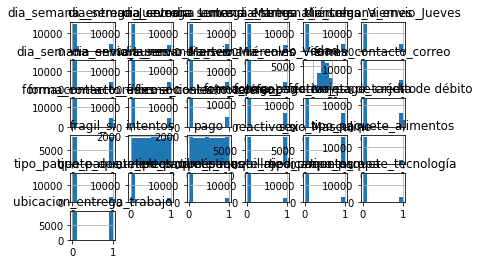

In [0]:

base10.drop(['tamaño'],1).hist()
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


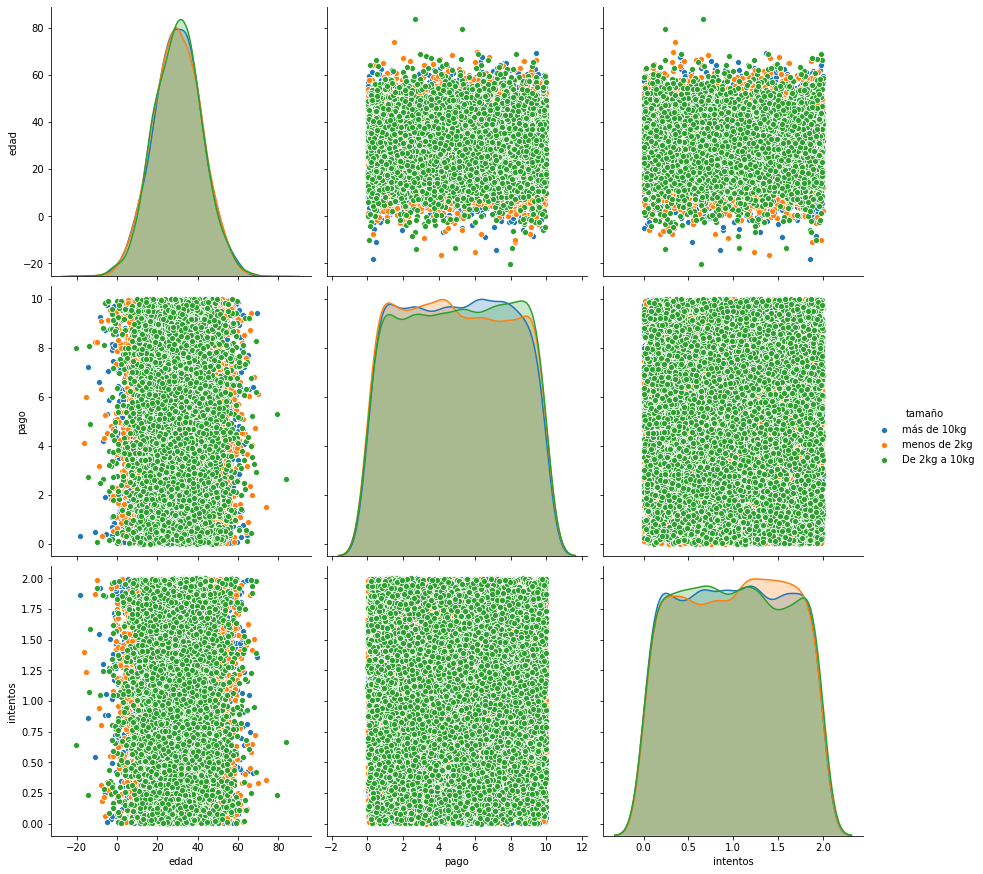

In [0]:
sb.pairplot(base10.dropna(), hue='tamaño',size=4,vars=["edad","pago","intentos"],kind='scatter')

In [0]:
base10.dtypes

PROVINCIA                                     object
CANTON                                        object
PARROQUIA                                     object
NOMBRE                                        object
sector                                        object
tamaño                                        object
edad                                         float64
pago                                         float64
intentos                                     float64
dia_semana_envio_Jueves                        uint8
dia_semana_envio_Lunes                         uint8
dia_semana_envio_Martes                        uint8
dia_semana_envio_Miércoles                     uint8
dia_semana_envio_Viernes                       uint8
dia_semana_entrega_Jueves                      uint8
dia_semana_entrega_Lunes                       uint8
dia_semana_entrega_Martes                      uint8
dia_semana_entrega_Miércoles                   uint8
dia_semana_entrega_Viernes                    

In [0]:
X = np.array(base10[["edad","pago","intentos"]])
#X = np.array(base10[["edad","pago","intentos","dia_semana_envio_Jueves",
#                     "dia_semana_envio_Lunes","dia_semana_envio_Martes","dia_semana_envio_Miércoles","dia_semana_envio_Viernes"
#                     ,"dia_semana_entrega_Jueves","dia_semana_entrega_Lunes","dia_semana_entrega_Martes","dia_semana_entrega_Miércoles"
#                     ,"dia_semana_entrega_Viernes","tipo_paquete_alimentos","tipo_paquete_documentos","tipo_paquete_electrodmésticos"
#                     ,"tipo_paquete_maquillaje","tipo_paquete_medicamentos","tipo_paquete_ropa","tipo_paquete_tecnología","sexo_Masculino"
#                     ,"ubicacion_entrega_trabajo","fragil_si","reactivo_si","forma_pago_efectivo","forma_pago_tarjeta de crédito"
#                     ,"forma_pago_tarjeta de débito","forma_contacto_correo","forma_contacto_físico","forma_contacto_redes sociosles(no correo)"
#                     ,"forma_contacto_teléfono"]])
y = np.array(base10['tamaño'])
X.shape

(18812, 3)

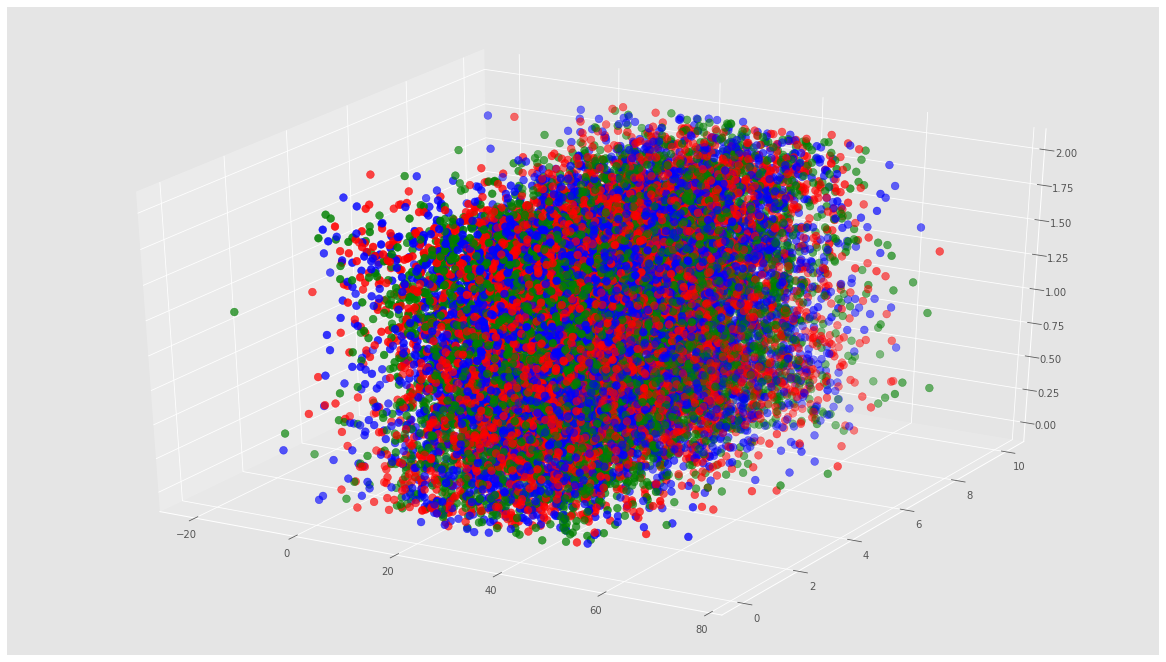

In [0]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

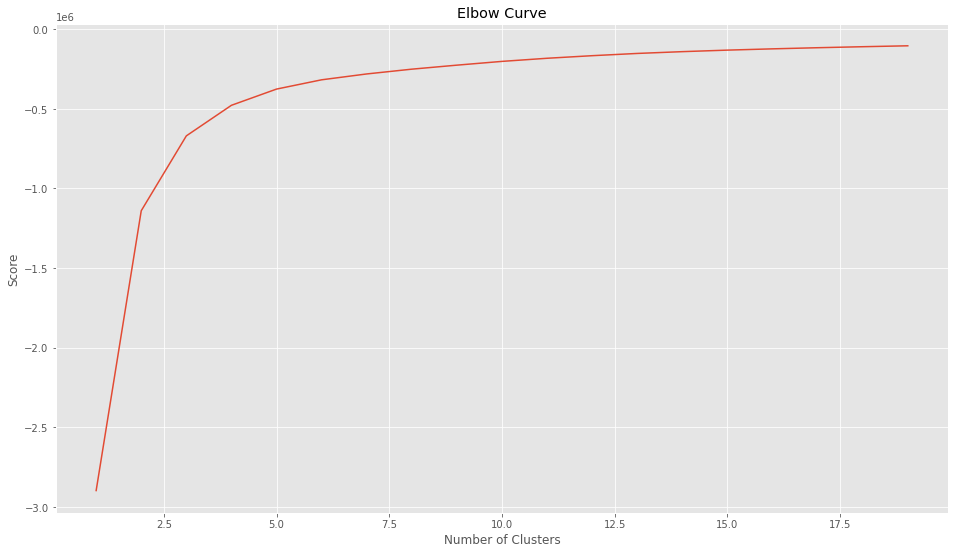

In [0]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [0]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[29.69525737  4.88620681  1.00175839]
 [ 8.82437325  5.04847969  1.02157425]
 [50.13321634  4.8831523   1.01211122]
 [20.32146855  4.99709853  0.99808364]
 [38.95839185  5.0026936   1.00142078]]


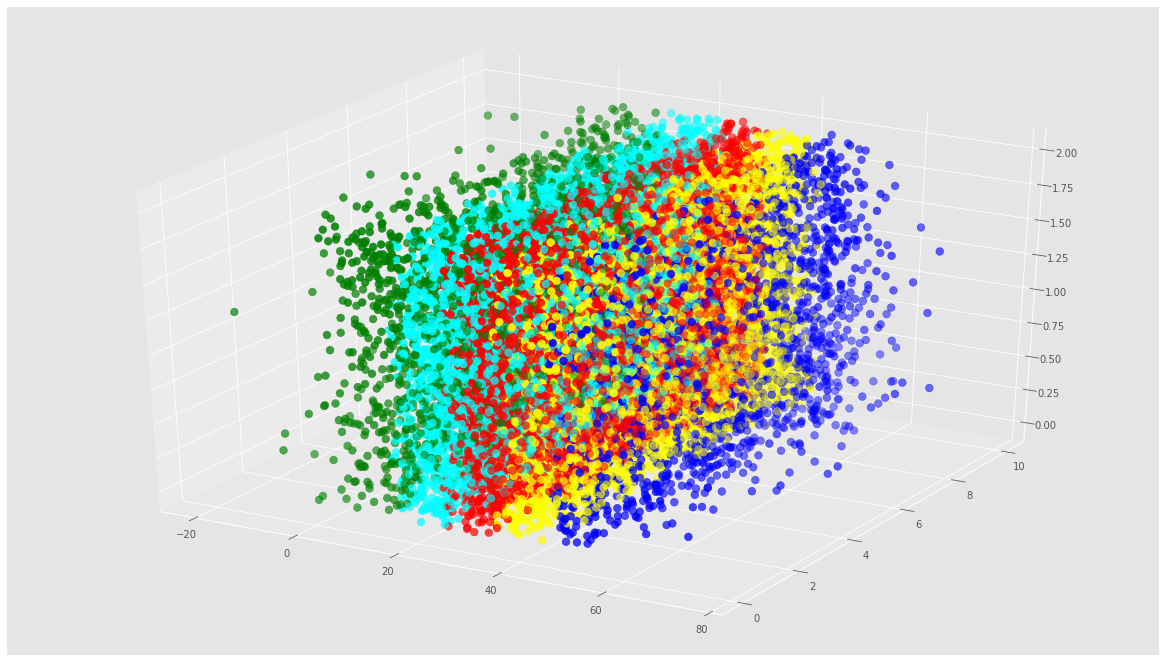

In [0]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

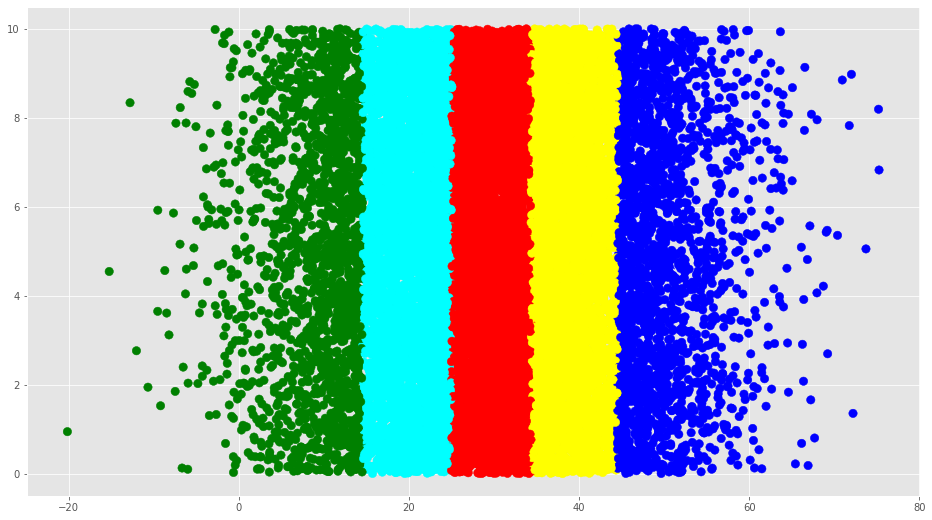

In [0]:
# Getting the values and plotting it
f1 = base10['edad'].values
f2 = base10['pago'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [0]:
copy =  pd.DataFrame()
#copy['usuario']=base10['usuario'].values
copy['tamaño']=base10['tamaño'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,5609
1,green,1877
2,blue,2210
3,cyan,4547
4,yellow,4569


# QUIENES SON?

In [0]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['tamaño']=[0,1,2,3]
diversidadGrupo['cantidad']=group_referrals.groupby('tamaño').size()
diversidadGrupo

,tamaño,cantidad
0,0,NaN
1,1,1890.0
2,2,1837.0
3,3,1882.0


In [0]:
group_referrals

,tamaño,label
2,3,0
4,3,0
7,2,0
10,3,0
16,3,0
...,...,...
18795,1,0
18799,3,0
18805,1,0
18806,3,0


In [0]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest # posicion de los usuarios

array([14854,  7328, 12192,  9155, 17639])

In [0]:
users=base10['NOMBRE'].values
for row in closest:
    print(users[row])

AZUAY
GUILLERMO SALVATIERRA  LEON
JUAN LEON MERA
ROBERTO PEAS
CUPA
